<a href="https://colab.research.google.com/github/AsiaAlrashed/DL-DS-ML/blob/main/advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("advertising.csv")
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0


In [3]:
df.shape

(1000, 10)

In [4]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [7]:
df.duplicated().sum()

0

 * **numeric** = ["Daily Time Spent on Site","Age","Area Income","Daily Internet Usage"]

 * **category** = ["Ad Topic Line " , "City" , "Male" ,"Country", "Timestamp","Clicked on Ad  "]

In [182]:
numeric = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
Category = [ 'Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad']

# target -> clicked on AD

<ipython-input-13-b31461b44f93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Clicked on Ad', data=df,palette="flare")


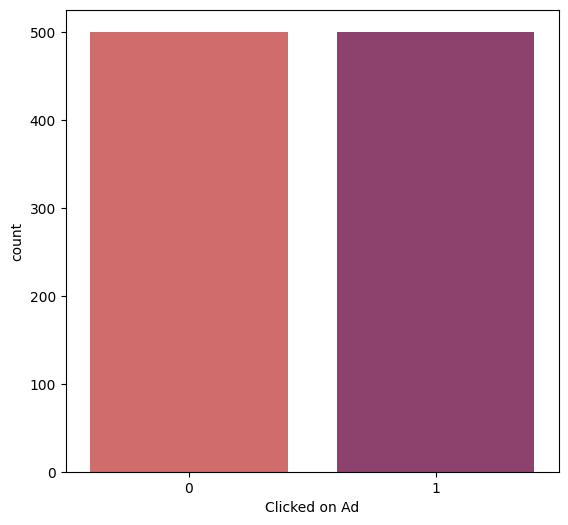

In [13]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.countplot(x='Clicked on Ad', data=df,palette="flare")
plt.show()

# **category**




⬇ **Country**

In [184]:
df[Category].describe(include = ['O'])

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Cloned 5thgeneration orchestration,Lisamouth,France
freq,1,3,9


In [8]:
 df['Country'].value_counts( ascending = False)

France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

In [185]:
coulmn = {
    'Country' : df['Country'],
    'mean_Clicked on Ad' :df['Clicked on Ad']
}

# Create a Dataframe object
df_country = pd.DataFrame(coulmn)
df_country = df_country.groupby(["Country"],as_index=False)[["mean_Clicked on Ad"]].mean()
df_country = df_country[df_country['mean_Clicked on Ad'] >= 0.6]
df_country.head(5)

,Country,mean_Clicked on Ad
0,Afghanistan,0.625000
3,American Samoa,0.600000
4,Andorra,1.000000
7,Antarctica,0.666667
8,Antigua and Barbuda,0.800000


In [ ]:
pip install pycountry_convert

In [12]:
#function to convert to alpah2 country codes and continents
import pycountry_convert
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col['Country'])
    except:

        cn_a2_code = 'Unknown'
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown'
    return cn_a2_code , cn_continent

In [14]:
df_country['Codes'] ,df_country['continent']= zip(*df_country.apply(get_continent , axis=1))
df_country.head(3)

,Country,mean_Clicked on Ad,Codes,continent
0,Afghanistan,0.625,AF,AS
3,American Samoa,0.600,AS,OC
4,Andorra,1.000,AD,EU


In [ ]:
pip install geopy

In [16]:
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")
def geolocate_long(country):
    try:
        # Geolocate the center of the country

        loc = geolocator.geocode(country['Country'])
        # And return latitude and longitude
        return loc.longitude
    except:
        # Return missing value
        return np.nan

def geolocate_lat(country):
    try:
        # Geolocate the center of the country

        loc = geolocator.geocode(country['Country'])
        # And return latitude and longitude
        return loc.latitude
    except:
        # Return missing value
        return np.nan

In [ ]:
df_country['geolocate_long']= df_country.apply(geolocate_long, axis=1)
df_country['geolocate_lat']= df_country.apply(geolocate_lat, axis=1)

In [18]:
df_country.head(3)

,Country,mean_Clicked on Ad,Codes,continent,geolocate_long,geolocate_lat
0,Afghanistan,0.625,AF,AS,66.238514,33.768006
3,American Samoa,0.600,AS,OC,-170.713148,-14.297124
4,Andorra,1.000,AD,EU,1.573203,42.540717


🔵 The average number of people who visited the site and saw the ad in these countries was between [0.95 , 1]

🟢 The average number of people who visited the site and saw the ad in these countries was between [0.85 , 0.95]

🟡The average number of people who visited the site and saw the ad in these countries was between [0.75 , 0.85]

🔴The average number of people who visited the site and saw the ad in these countries was between [0.6 , 0.75]


In [ ]:
pip install folium

In [88]:
# Create a world map to show distributions of users
import folium
from folium.plugins import MarkerCluster
#empty map
world_map= folium.Map(zoom_start=3,tiles="cartodb positron")
#marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df_country)):
        lat = df_country.iloc[i]['geolocate_lat']
        long = df_country.iloc[i]['geolocate_long']
        radius=0
        popup_text = """Country : {}<br>"""
        popup_text = popup_text.format(df_country.iloc[i]['Country']
                                        )
        if(0.6 <= df_country.iloc[i]['mean_Clicked on Ad']<= 0.75):
          radius = 1
          folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text,color='#fc3d03', fill =True).add_to(world_map)

        if (0.75 < df_country.iloc[i]['mean_Clicked on Ad']<= 0.85):
          radius = 1.5
          folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text,color='#fcb603', fill =True).add_to(world_map)

        if (0.85 < df_country.iloc[i]['mean_Clicked on Ad']<= 0.95):
          radius = 2
          folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text,color='#03fc30', fill =True).add_to(world_map)

        if (0.95 < df_country.iloc[i]['mean_Clicked on Ad']<= 1):
          radius = 2.5
          folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text,color='#03a5fc', fill =True).add_to(world_map)
#show the map
world_map

⬇ **gender**

In [39]:
df['Male'].value_counts()

0    519
1    481
Name: Male, dtype: int64

In [41]:
df.groupby(['Male', 'Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


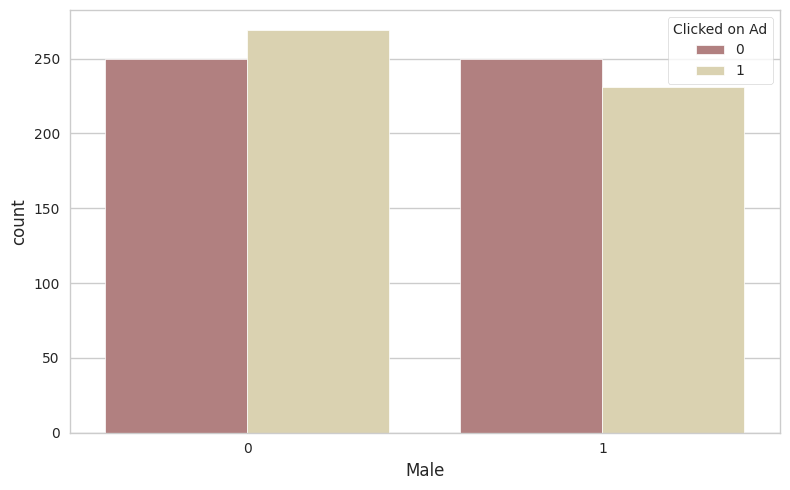

In [137]:
f,ax=plt.subplots(1,1,figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Male', hue='Clicked on Ad', data=df, palette='pink',ax=ax)
plt.tight_layout()
plt.show()

⬇ **Ad Topic Line**

In [62]:
len(np.unique(df['Ad Topic Line']))

1000

In [63]:
 df['Ad Topic Line'].value_counts( ascending = False)

Cloned 5thgeneration orchestration              1
Synchronized multi-tasking ability              1
Customer-focused impactful success              1
Open-source optimizing parallelism              1
Organic logistical adapter                      1
                                               ..
Enhanced zero tolerance Graphic Interface       1
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Virtual 5thgeneration emulation                 1
Name: Ad Topic Line, Length: 1000, dtype: int64

In [74]:
coulmn = {
    'Ad Topic Line' : df['Ad Topic Line'],
    'mean_Clicked on Ad' :df['Clicked on Ad']
}

# Create a Dataframe object
df_Topic_Line = pd.DataFrame(coulmn)
df_Topic_Line = df_Topic_Line.groupby(["Ad Topic Line"],as_index=False)[["mean_Clicked on Ad"]].mean()
df_Topic_Line = df_Topic_Line[df_Topic_Line['mean_Clicked on Ad'] >= 0.6]
df_Topic_Line.head(3)

,Ad Topic Line,mean_Clicked on Ad
1,Adaptive asynchronous attitude,1.0
2,Adaptive context-sensitive application,1.0
3,Adaptive contextually-based methodology,1.0


# ⚪ **note**

# There is no correlation between Ad Topic Line and Clicked on Ad

⬇ **Timestamp**

In [29]:
# Converting timestamp column into datatime object in order to extract new features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Weekday'] = df['Timestamp'].dt.dayofweek

In [12]:
df = df.drop(['Timestamp'], axis=1)
df = df.drop(['City'], axis=1)
df = df.drop(['Ad Topic Line'], axis=1)
df = df.drop(['Day'], axis=1)
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Clicked on Ad,Month,Hour,Weekday
0,68.95,35,61833.90,256.09,0,Tunisia,0,3,0,6
1,80.23,31,68441.85,193.77,1,Nauru,0,4,1,0
2,69.47,26,59785.94,236.50,0,San Marino,0,3,20,6


In [76]:
df.groupby(['Month', 'Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Month,,
1,56,57
2,64,57
3,72,71
4,69,57
5,65,65
6,53,62
7,43,42
8,20,15
9,14,20


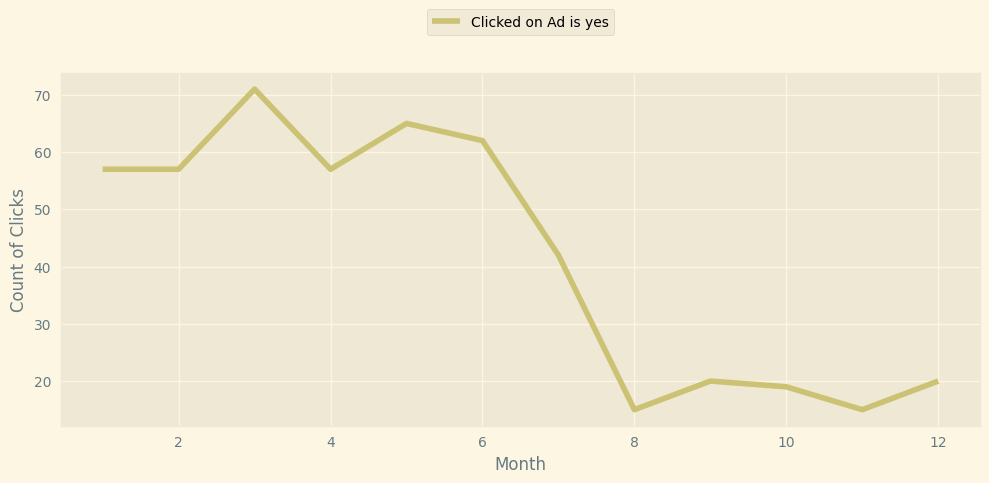

In [173]:
plt.style.use("Solarize_Light2")
f,ax=plt.subplots(1,1,figsize=(10,5))
plt.plot(df['Month'][df['Clicked on Ad']==1].value_counts().sort_index(),color="#cbc274",linewidth=4,label="Clicked on Ad is yes")
#ax.set_title('Months Vs Clicks',color="gray")
ax.set_ylabel('Count of Clicks')
ax.set_xlabel('Month')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center',labelcolor='black')
plt.tight_layout()
plt.show()

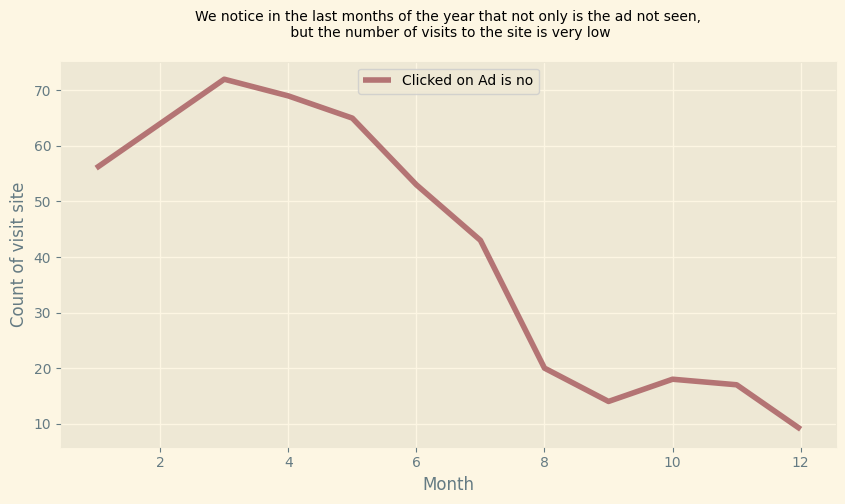

In [32]:
plt.style.use("Solarize_Light2")
f,ax=plt.subplots(1,1,figsize=(10,5))
plt.plot(df['Month'][df['Clicked on Ad']==0].value_counts().sort_index(),color = "#b47474",linewidth=4,label="Clicked on Ad is no")
ax.set_title('We notice in the last months of the year that not only is the ad not seen,\n but the number of visits to the site is very low\n',color="black",fontdict ={'fontsize':10})
ax.set_ylabel('Count of visit site')
ax.set_xlabel('Month')
plt.legend(loc='upper center',labelcolor='black')
plt.show()

In [82]:
df.groupby(['Weekday', 'Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Weekday,,
0,68,82
1,59,66
2,76,76
3,64,66
4,74,75
5,68,71
6,91,64


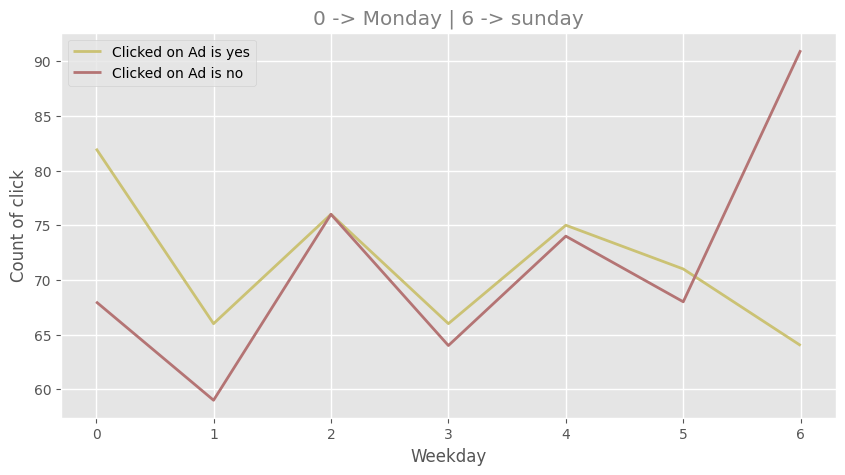

In [34]:
plt.style.use("ggplot")
f,ax=plt.subplots(1,1,figsize=(10,5))
plt.plot(df['Weekday'][df['Clicked on Ad']==1].value_counts().sort_index(), label = "Clicked on Ad is yes" , color = "#cbc274" )
plt.plot(df['Weekday'][df['Clicked on Ad']==0].value_counts().sort_index(), label = "Clicked on Ad is no " ,color = "#b47474")
ax.set_title('0 -> Monday | 6 -> sunday' , color ="gray" )
ax.set_ylabel('Count of click')
ax.set_xlabel('Weekday')
plt.legend(labelcolor='black')
plt.show()

In [91]:
df.groupby(['Hour', 'Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Hour,,
0,19,26
1,16,16
2,19,17
3,19,23
4,21,21
5,23,21
6,16,23
7,28,26
8,22,21


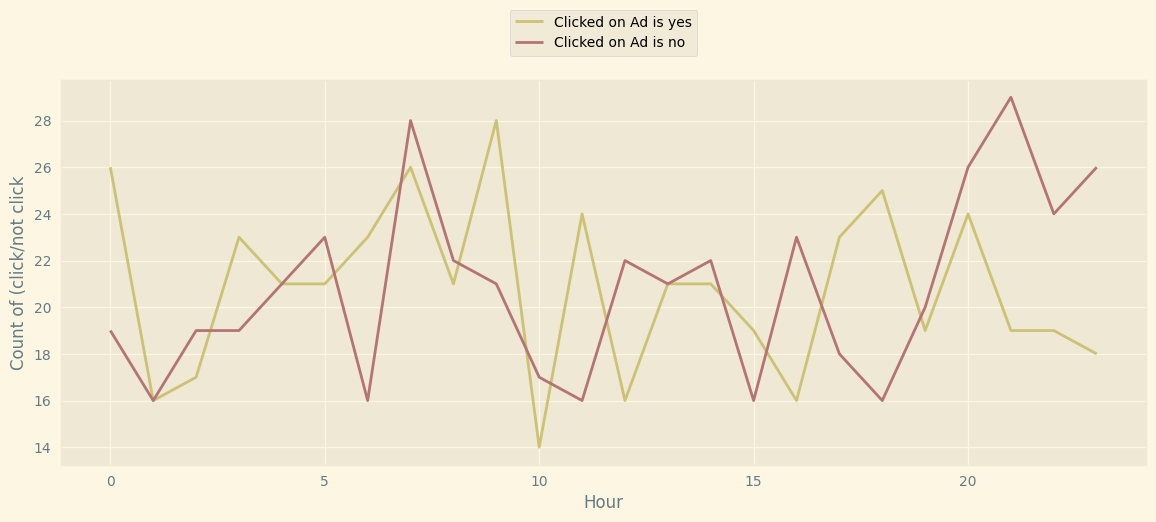

In [177]:
plt.style.use("Solarize_Light2")
f,ax=plt.subplots(1,1,figsize=(14,5))
#df['Hour'][df['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax)
plt.plot(df['Hour'][df['Clicked on Ad']==1].value_counts().sort_index(), label = "Clicked on Ad is yes" , color = "#cbc274")
plt.plot(df['Hour'][df['Clicked on Ad']==0].value_counts().sort_index(), label = "Clicked on Ad is no " ,color = "#b47474")
#df['Hour'][df['Clicked on Ad']==0].value_counts().sort_index().plot(ax=ax)
ax.set_title('   ')
ax.set_ylabel('Count of (click/not click')
ax.set_xlabel('Hour')
plt.legend(bbox_to_anchor=(0.5, 1.2),loc='upper center',labelcolor='black')
plt.show()

# numeric

In [187]:
df[numeric].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


<ipython-input-201-5da2900d6845>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[plot], bins=20,color ="#b47474")


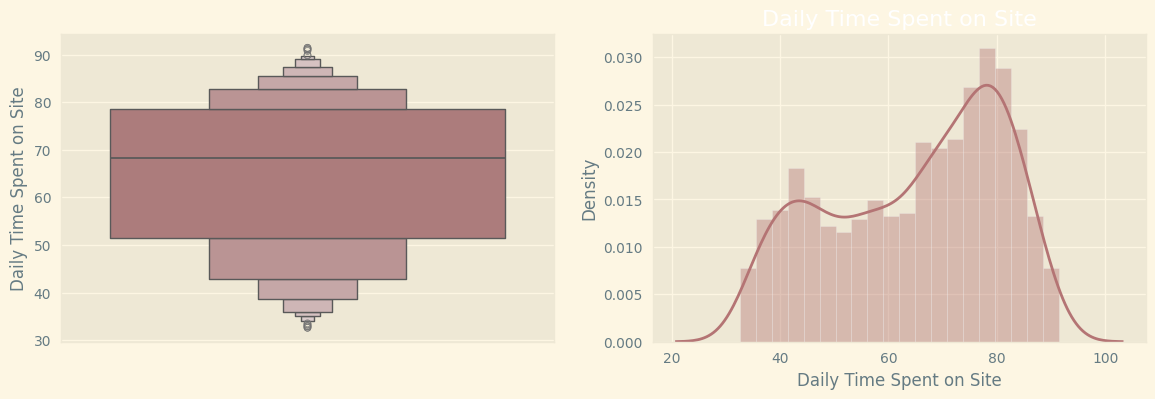

In [201]:
def plots(plot):
    plt.figure(figsize=(14, 6)).set_figheight(4)
    plt.subplot(1,2,1)
    sns.boxenplot(df[plot],color ="#b47474")
    plt.subplot(1,2,2)
    sns.distplot(df[plot], bins=20,color ="#b47474")
    plt.title(plot)
    plt.show()
plots(numeric[0])

<ipython-input-201-5da2900d6845>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[plot], bins=20,color ="#b47474")


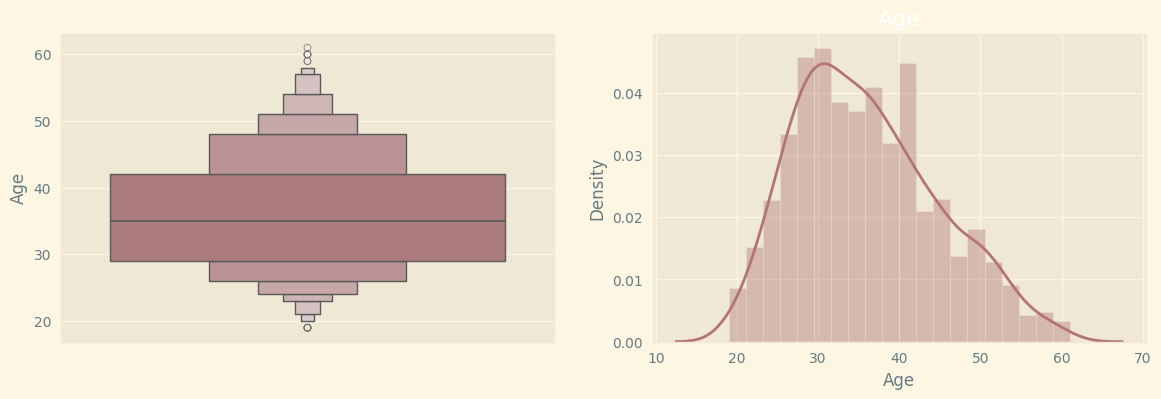

In [202]:
plots(numeric[1])

<ipython-input-201-5da2900d6845>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[plot], bins=20,color ="#b47474")


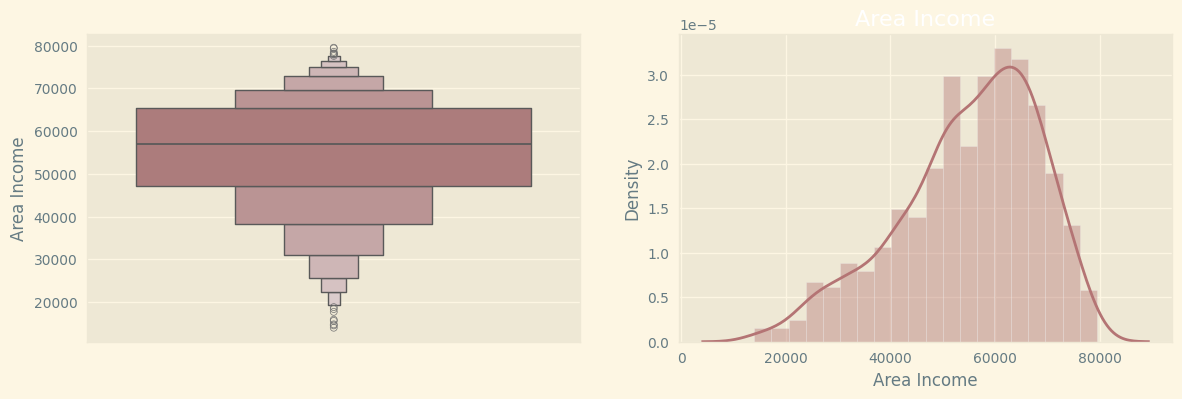

In [203]:
plots(numeric[2])

<ipython-input-201-5da2900d6845>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[plot], bins=20,color ="#b47474")


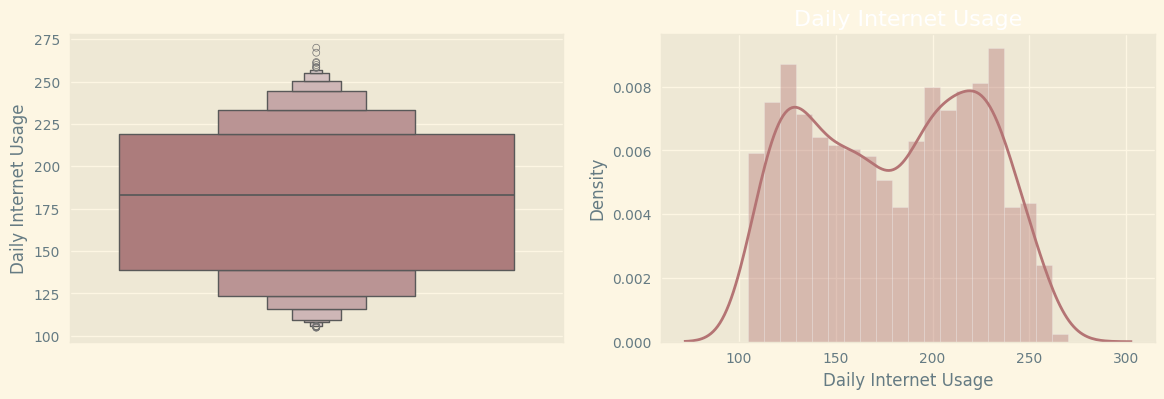

In [204]:
plots(numeric[3])

<ipython-input-14-cebbcec2453e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap=cmap, annot=True)


<Axes: >

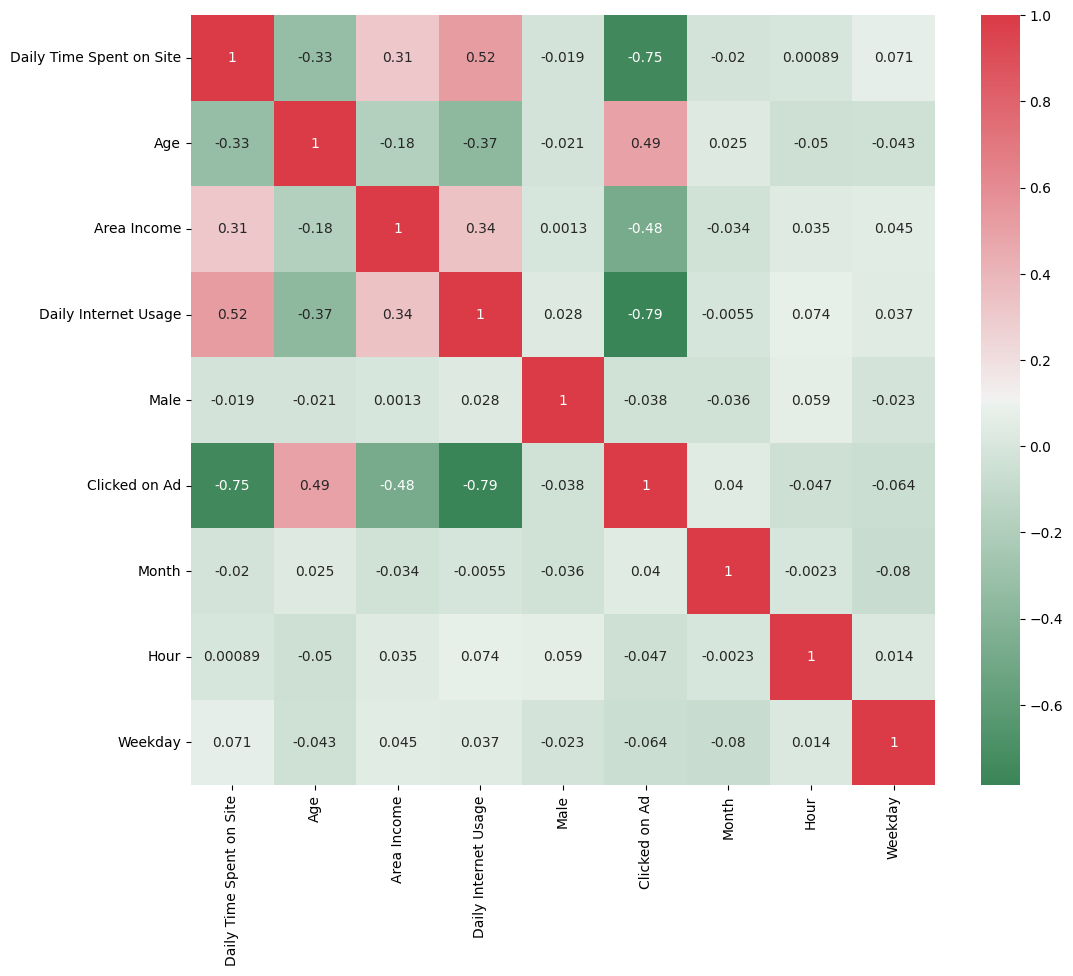

In [14]:
fig = plt.figure(figsize=(12,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, annot=True)

⬇ **Age**

In [35]:
coulmn = {
    'Age' : df['Age'],
    'Clicked_on_Ad' :df['Clicked on Ad']
}
# Create a Dataframe object
df_Age = pd.DataFrame(coulmn)
df_Age.head(3)

,Age,Clicked_on_Ad
0,35,0
1,31,0
2,26,0


Text(0.5, 1.0, 'Histogram of Age')

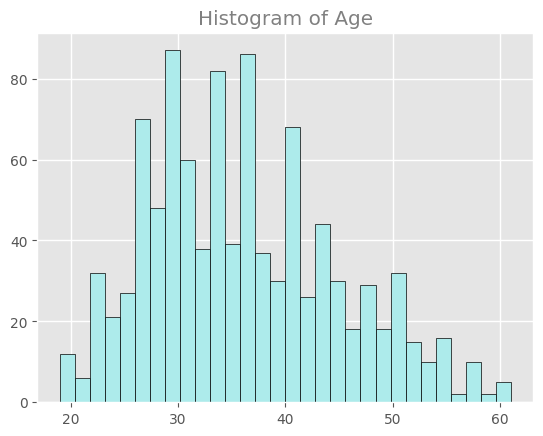

In [38]:
plt.hist(df_Age["Age"], color='#adebeb', ec='black', bins=30)
plt.title ("Histogram of Age" , color = "gray")

In [5]:
print("min =", df_Age.query("Clicked_on_Ad ==0")["Age"].min())
print("max =",df_Age.query("Clicked_on_Ad ==0")["Age"].max())
print("mean =" ,df_Age.query("Clicked_on_Ad ==0")["Age"].mean())
print("median =",df_Age.query("Clicked_on_Ad ==0")["Age"].median())
print("std =",df_Age.query("Clicked_on_Ad ==0")["Age"].std())

min = 19
max = 53
mean = 31.684
median = 31.0
std = 6.212998204843356


In [13]:
print("min =", df_Age.query("Clicked_on_Ad ==1")["Age"].min())
print("max =",df_Age.query("Clicked_on_Ad ==1")["Age"].max())
print("mean =" ,df_Age.query("Clicked_on_Ad ==1")["Age"].mean())
print("median =",df_Age.query("Clicked_on_Ad ==1")["Age"].median())
print("std =",df_Age.query("Clicked_on_Ad ==1")["Age"].std())

min = 19
max = 61
mean = 40.334
median = 40.0
std = 8.85659769015679


⬇ **Area Income**

In [4]:
coulmn = {
    'Area_Income' : df['Area Income'],
    'Clicked_on_Ad' :df['Clicked on Ad']
}
# Create a Dataframe object
df_Area_Income = pd.DataFrame(coulmn)
df_Area_Income.head(3)

,Area_Income,Clicked_on_Ad
0,61833.90,0
1,68441.85,0
2,59785.94,0


Text(0.5, 1.0, 'Histogram of Area_Income')

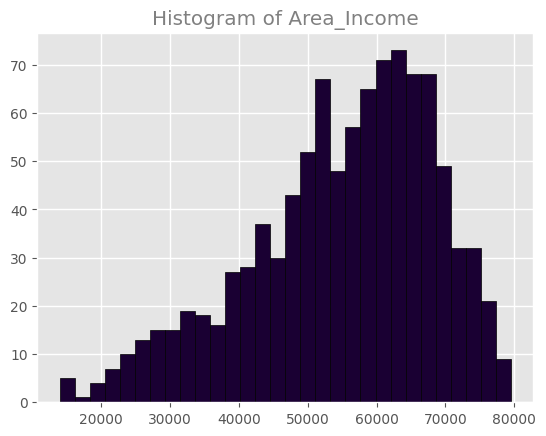

In [39]:
plt.hist(df_Area_Income["Area_Income"], color='#1a0033', ec='black', bins=30)
plt.title ("Histogram of Area_Income" , color = "gray")

In [9]:
print("min =", df_Area_Income.query("Clicked_on_Ad ==0")["Area_Income"].min())
print("max =",df_Area_Income.query("Clicked_on_Ad ==0")["Area_Income"].max())
print("mean =" ,df_Area_Income.query("Clicked_on_Ad ==0")["Area_Income"].mean())
print("median =",df_Area_Income.query("Clicked_on_Ad ==0")["Area_Income"].median())
print("std =",df_Area_Income.query("Clicked_on_Ad ==0")["Area_Income"].std())

min = 33239.2
max = 79484.8
mean = 61385.58642
median = 62275.405
std = 8904.060180193235


In [10]:
print("min =", df_Area_Income.query("Clicked_on_Ad ==1")["Area_Income"].min())
print("max =",df_Area_Income.query("Clicked_on_Ad ==1")["Area_Income"].max())
print("mean =" ,df_Area_Income.query("Clicked_on_Ad ==1")["Area_Income"].mean())
print("median =",df_Area_Income.query("Clicked_on_Ad ==1")["Area_Income"].median())
print("std =",df_Area_Income.query("Clicked_on_Ad ==1")["Area_Income"].std())

min = 13996.5
max = 78520.99
mean = 48614.413739999996
median = 49417.255000000005
std = 14116.24223201224


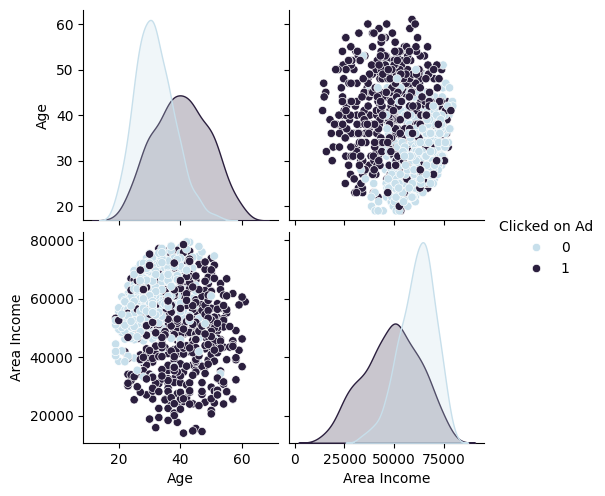

In [37]:
sns.pairplot(df, hue='Clicked on Ad', vars=["Age","Area Income"], palette='ch:s=.25,rot=-.25')

⬇ **Daily Internet Usage**

In [6]:
coulmn = {
    'Daily_Internet_Usage' : df['Daily Internet Usage'],
    'Clicked_on_Ad' :df['Clicked on Ad']
}
# Create a Dataframe object
df_Daily_Internet_Usage = pd.DataFrame(coulmn)
df_Daily_Internet_Usage.head(3)

,Daily_Internet_Usage,Clicked_on_Ad
0,256.09,0
1,193.77,0
2,236.50,0


Text(0.5, 1.0, 'Histogram of Daily_Internet_Usage')

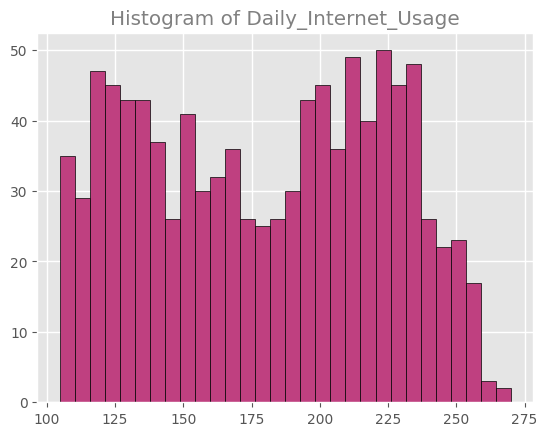

In [40]:
plt.hist(df_Daily_Internet_Usage["Daily_Internet_Usage"], color='#bf4080', ec='black', bins=30)
plt.title ("Histogram of Daily Internet Usage" , color = "gray")

In [28]:
print("min =", df_Daily_Internet_Usage.query("Clicked_on_Ad ==0")["Daily_Internet_Usage"].min())
print("max =",df_Daily_Internet_Usage.query("Clicked_on_Ad ==0")["Daily_Internet_Usage"].max())
print("mean =" ,df_Daily_Internet_Usage.query("Clicked_on_Ad ==0")["Daily_Internet_Usage"].mean())
print("median =",df_Daily_Internet_Usage.query("Clicked_on_Ad ==0")["Daily_Internet_Usage"].median())
print("std =",df_Daily_Internet_Usage.query("Clicked_on_Ad ==0")["Daily_Internet_Usage"].std())

min = 146.19
max = 267.01
mean = 214.51373999999998
median = 216.365
std = 23.8743820789503


In [29]:
print("min =", df_Daily_Internet_Usage.query("Clicked_on_Ad ==1")["Daily_Internet_Usage"].min())
print("max =",df_Daily_Internet_Usage.query("Clicked_on_Ad ==1")["Daily_Internet_Usage"].max())
print("mean =" ,df_Daily_Internet_Usage.query("Clicked_on_Ad ==1")["Daily_Internet_Usage"].mean())
print("median =",df_Daily_Internet_Usage.query("Clicked_on_Ad ==1")["Daily_Internet_Usage"].median())
print("std =",df_Daily_Internet_Usage.query("Clicked_on_Ad ==1")["Daily_Internet_Usage"].std())

min = 104.78
max = 269.96
mean = 145.48646000000002
median = 138.79000000000002
std = 30.025825925583245


In [42]:
coulmn = {
    'Daily_Time_Spent_on_Site' : df['Daily Time Spent on Site'],
    'Clicked_on_Ad' :df['Clicked on Ad']
}
# Create a Dataframe object
df_Daily_Time_Spent_on_Site = pd.DataFrame(coulmn)
df_Daily_Time_Spent_on_Site.head(3)

,Daily_Time_Spent_on_Site,Clicked_on_Ad
0,68.95,0
1,80.23,0
2,69.47,0


Text(0.5, 1.0, 'Histogram of Daily Time Spent on Site')

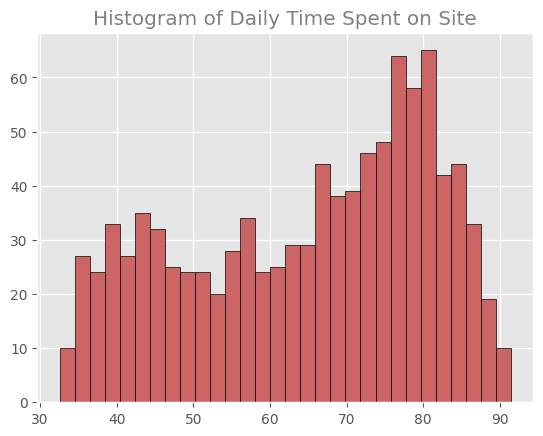

In [43]:
plt.hist(df_Daily_Time_Spent_on_Site["Daily_Time_Spent_on_Site"], color='#cc6666', ec='black', bins=30)
plt.title ("Histogram of Daily Time Spent on Site" , color = "gray")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

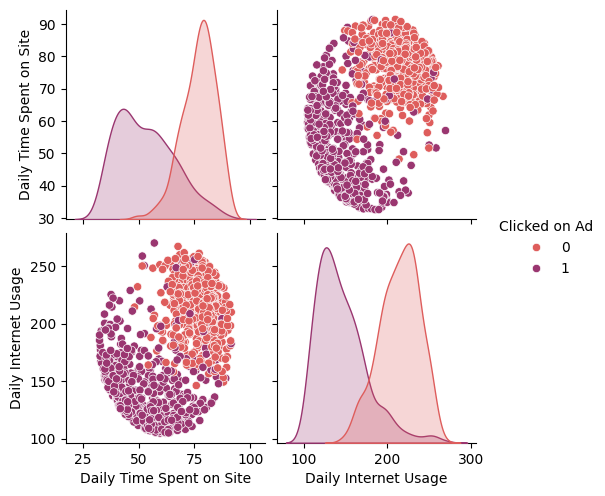

In [31]:
sns.pairplot(df, hue='Clicked on Ad', vars=["Daily Time Spent on Site","Daily Internet Usage"], palette="flare")

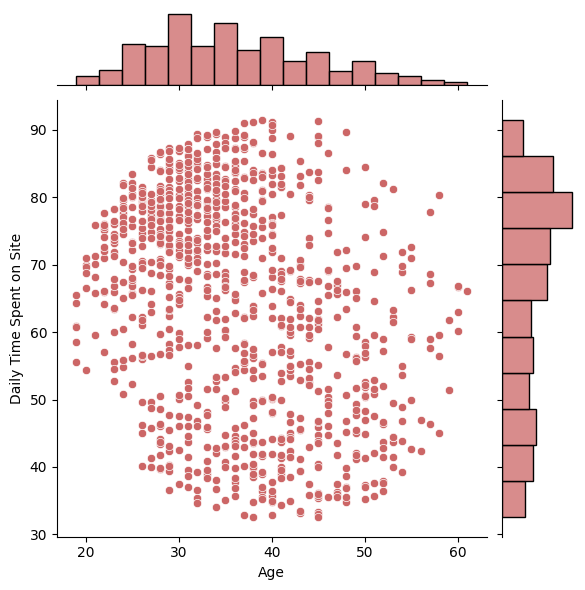

In [21]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df, color = '#cc6666')

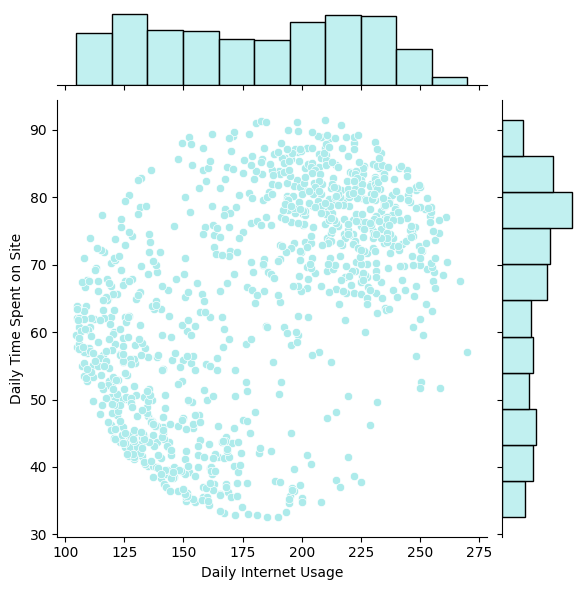

In [22]:
sns.jointplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=df, color = "#adebeb")

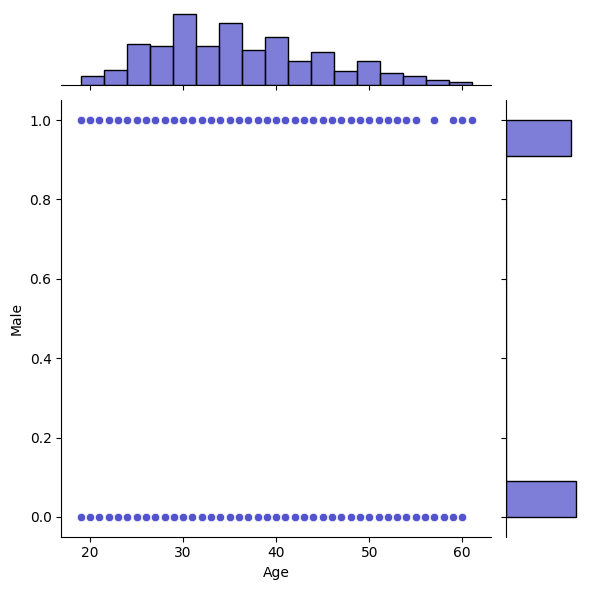

In [25]:
sns.jointplot(x='Age', y='Male', data=df, color = '#5353cd')

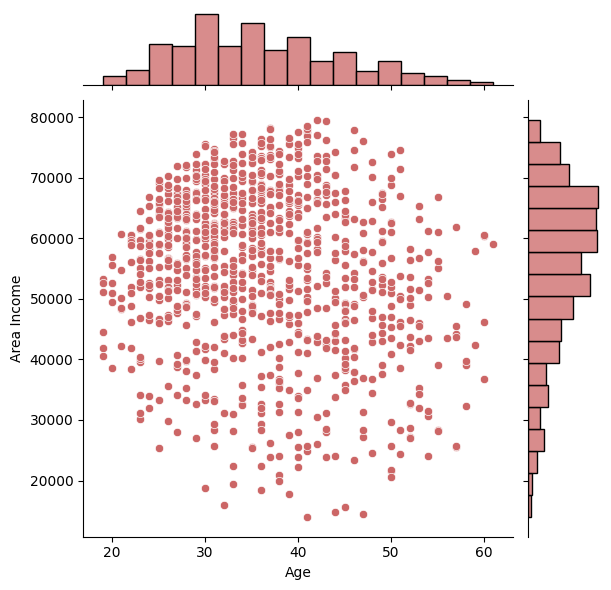

In [24]:
sns.jointplot(x='Age', y='Area Income', data=df, color = '#cc6666')